In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('keywords_data.csv')

# 1. Handle Nulls for Matrix Analysis
# We fill Volume with 0 and KD with the average if missing to avoid losing data points
df['Search Volume'] = df['Search Volume'].fillna(0)
df['Keyword Difficulty'] = df['Keyword Difficulty'].fillna(df['Keyword Difficulty'].median())
df['CPC'] = df['CPC'].fillna(0)

# 2. Define Thresholds
vol_threshold = df['Search Volume'].median()
kd_threshold = df['Keyword Difficulty'].median()
cpc_threshold = df['CPC'].median()

print(f"Volume Threshold: {vol_threshold}")
print(f"Difficulty Threshold: {kd_threshold}")
print(f"CPC Threshold: {cpc_threshold}")

Volume Threshold: 10.0
Difficulty Threshold: 21.0
CPC Threshold: 0.0


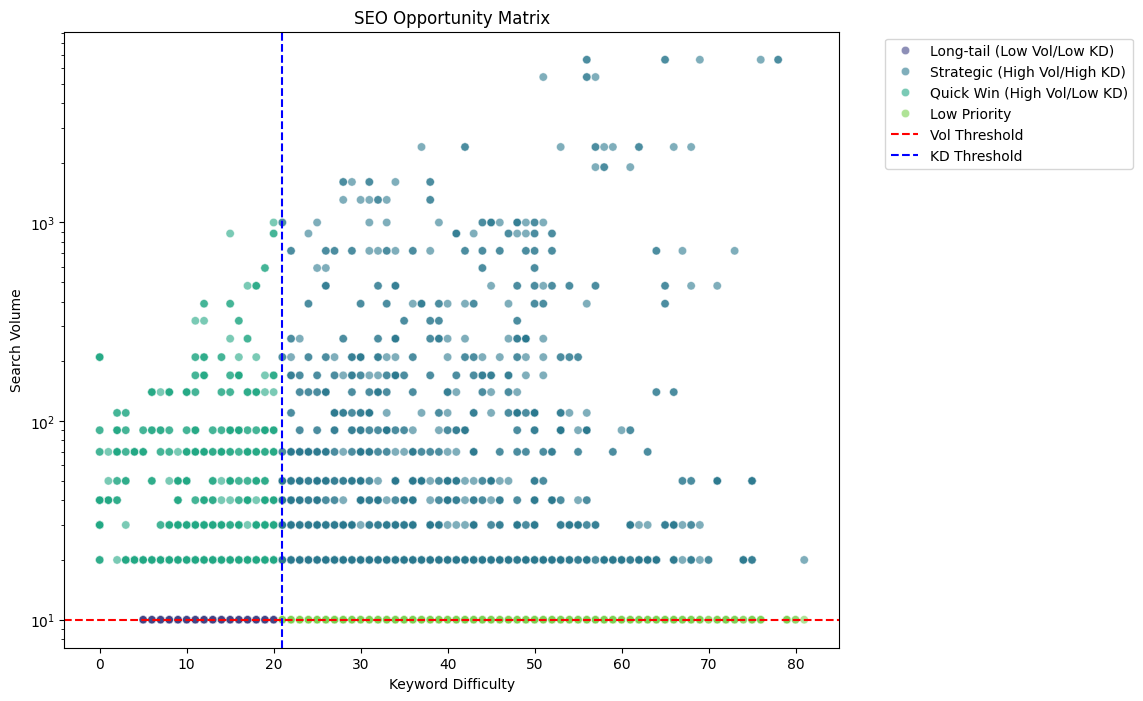

In [2]:
def classify_opportunity(row):
    if row['Search Volume'] > vol_threshold and row['Keyword Difficulty'] < kd_threshold:
        return 'Quick Win (High Vol/Low KD)'
    elif row['Search Volume'] > vol_threshold and row['Keyword Difficulty'] >= kd_threshold:
        return 'Strategic (High Vol/High KD)'
    elif row['Search Volume'] <= vol_threshold and row['Keyword Difficulty'] < kd_threshold:
        return 'Long-tail (Low Vol/Low KD)'
    else:
        return 'Low Priority'

df['Opportunity_Quadrant'] = df.apply(classify_opportunity, axis=1)

# Visualize the Opportunity Matrix
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Keyword Difficulty', y='Search Volume', 
                hue='Opportunity_Quadrant', palette='viridis', alpha=0.6)

plt.axhline(vol_threshold, color='red', linestyle='--', label='Vol Threshold')
plt.axvline(kd_threshold, color='blue', linestyle='--', label='KD Threshold')
plt.yscale('log') # Log scale helps see clusters better
plt.title('SEO Opportunity Matrix')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

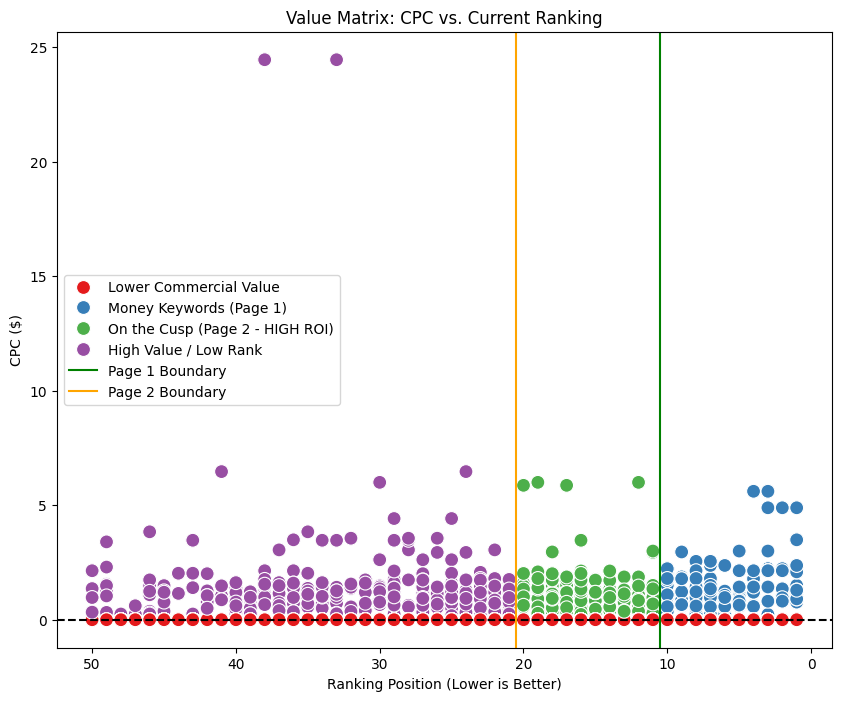

In [3]:
# We use Yachting Pages as the example domain
target_rank_col = 'yatchingpages.com_cleaned_rank'

def classify_value(row):
    rank = row[target_rank_col]
    cpc = row['CPC']
    
    if cpc > cpc_threshold:
        if rank <= 10:
            return 'Money Keywords (Page 1)'
        elif 11 <= rank <= 20:
            return 'On the Cusp (Page 2 - HIGH ROI)'
        else:
            return 'High Value / Low Rank'
    return 'Lower Commercial Value'

df['Value_Quadrant'] = df.apply(classify_value, axis=1)

# Visualize the Value Matrix
plt.figure(figsize=(10, 8))
# Filter for keywords with Rank <= 50 to focus the visualization
value_plot_df = df[df[target_rank_col] <= 50]

sns.scatterplot(data=value_plot_df, x=target_rank_col, y='CPC', 
                hue='Value_Quadrant', palette='Set1', s=100)

plt.axhline(cpc_threshold, color='black', linestyle='--')
plt.axvline(10.5, color='green', linestyle='-', label='Page 1 Boundary')
plt.axvline(20.5, color='orange', linestyle='-', label='Page 2 Boundary')

plt.title('Value Matrix: CPC vs. Current Ranking')
plt.xlabel('Ranking Position (Lower is Better)')
plt.ylabel('CPC ($)')
plt.gca().invert_xaxis() # Invert so Rank 1 is on the right/top area
plt.legend()
plt.show()

In [4]:
# Extract the high-priority "On the Cusp" keywords
priority_list = df[df['Value_Quadrant'] == 'On the Cusp (Page 2 - HIGH ROI)'].sort_values(by='CPC', ascending=False)

print(f"Found {len(priority_list)} high-value keywords on the cusp of Page 1.")
# Display top 10
priority_list[['Keyword', 'Search Volume', 'Keyword Difficulty', 'CPC', target_rank_col]].head(10)

Found 208 high-value keywords on the cusp of Page 1.


,Keyword,Search Volume,Keyword Difficulty,CPC,yatchingpages.com_cleaned_rank
300,yacht concierge,70,5,6.00,19
2462,yacht concierge,70,2,6.00,12
6404,yacht concierge,70,2,6.00,12
770,yacht refit,30,16,5.87,17
4929,yacht refit,30,16,5.87,20
4444,yacht chandler,0,22,3.47,16
3129,yacht agent,10,19,3.00,11
7071,yacht agent,10,19,3.00,11
6417,yacht crew insurance,50,15,2.96,18
4450,yacht crew insurance,50,18,2.96,18
